<center><font color='tomato' size=20>Visualizaciones</font></center>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
dfene = pd.read_csv('../Data/sales_2017_enero.csv', parse_dates=['date'])
dffeb = pd.read_csv('../Data/sales_2017_febrero.csv', parse_dates=['date'])
dfmar = pd.read_csv('../Data/sales_2017_marzo.csv', parse_dates=['date'])

In [3]:
dftri = pd.concat([dfene, dffeb, dfmar])

In [4]:
stores = pd.read_csv('../Data/stores.csv')

In [5]:
dfm = dftri.merge(stores, on='store_nbr') # merge de los datos de ventas con los datos de tiendas

In [6]:
dfm

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster
0,101688779,2017-01-01,25,99197,1.0,False,Salinas,Santa Elena,D,1
1,101688780,2017-01-01,25,103665,7.0,False,Salinas,Santa Elena,D,1
2,101688781,2017-01-01,25,105574,1.0,False,Salinas,Santa Elena,D,1
3,101688782,2017-01-01,25,105857,4.0,False,Salinas,Santa Elena,D,1
4,101688783,2017-01-01,25,106716,2.0,False,Salinas,Santa Elena,D,1
...,...,...,...,...,...,...,...,...,...,...
9318742,111007521,2017-03-31,54,2049778,13.0,False,El Carmen,Manabi,C,3
9318743,111007522,2017-03-31,54,2053590,4.0,False,El Carmen,Manabi,C,3
9318744,111007523,2017-03-31,54,2053610,2.0,False,El Carmen,Manabi,C,3
9318745,111007524,2017-03-31,54,2057387,6.0,False,El Carmen,Manabi,C,3


In [19]:
dfgy = dfm.loc[(dfm['state'] == 'Guayas') & ((dfm['date'] >= '2017-01-01') & (dfm['date'] <= '2017-01-31'))]

In [20]:
dfgy

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster
4083281,101738779,2017-01-02,24,103665,2.000,False,Guayaquil,Guayas,D,1
4083282,101738780,2017-01-02,24,105574,6.000,False,Guayaquil,Guayas,D,1
4083283,101738781,2017-01-02,24,105575,9.000,False,Guayaquil,Guayas,D,1
4083284,101738782,2017-01-02,24,105693,2.000,False,Guayaquil,Guayas,D,1
4083285,101738783,2017-01-02,24,105737,4.000,False,Guayaquil,Guayas,D,1
...,...,...,...,...,...,...,...,...,...,...
8884001,104820263,2017-01-31,51,2048609,15.000,False,Guayaquil,Guayas,A,17
8884002,104820264,2017-01-31,51,2048624,11.000,False,Guayaquil,Guayas,A,17
8884003,104820265,2017-01-31,51,2048633,3.000,False,Guayaquil,Guayas,A,17
8884004,104820266,2017-01-31,51,2054291,1.000,False,Guayaquil,Guayas,A,17


In [13]:
dfpi = dfm.loc[(dfm['state'] == 'Pichincha') & ((dfm['date'] >= '2017-01-01') & (dfm['date'] <= '2017-01-31'))]

In [14]:
dfpi

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster
161676,101690472,2017-01-02,1,103520,1.000,False,Quito,Pichincha,D,13
161677,101690473,2017-01-02,1,105575,3.000,False,Quito,Pichincha,D,13
161678,101690474,2017-01-02,1,105577,1.000,False,Quito,Pichincha,D,13
161679,101690475,2017-01-02,1,105737,1.000,False,Quito,Pichincha,D,13
161680,101690476,2017-01-02,1,108079,2.000,False,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
8427873,104815536,2017-01-31,49,2048624,20.000,False,Quito,Pichincha,A,11
8427874,104815537,2017-01-31,49,2048633,9.000,False,Quito,Pichincha,A,11
8427875,104815538,2017-01-31,49,2054101,5.000,False,Quito,Pichincha,A,11
8427876,104815539,2017-01-31,49,2054291,2.000,False,Quito,Pichincha,A,11


<AxesSubplot:xlabel='date', ylabel='unit_sales'>

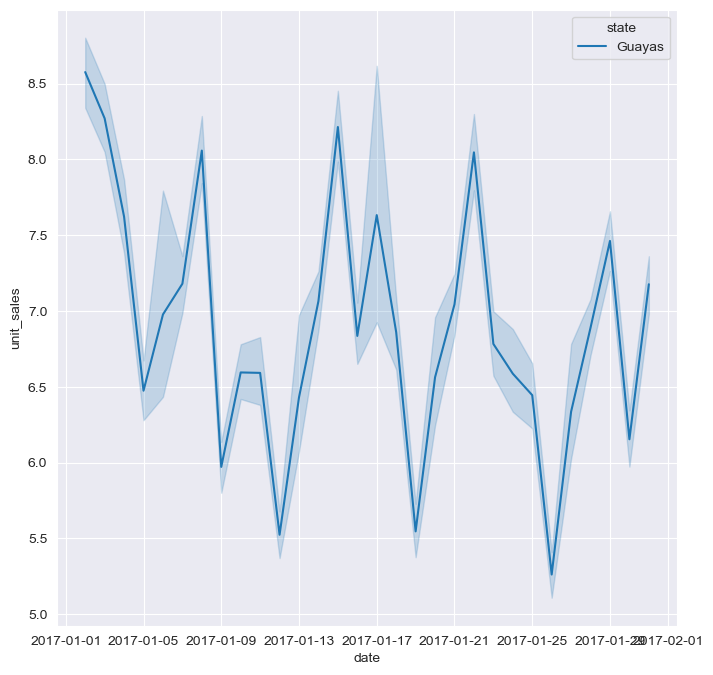

In [24]:
sbn.set_style('darkgrid')
fig,axs = plt.subplots(figsize=(8,8))
sbn.lineplot(data= dfgy, x ='date', y = 'unit_sales', color='b', markers=False, ax=axs, hue='state')

In [41]:
dfgy_groupby = dfgy.groupby(['date'])['unit_sales'].sum().reset_index()
dfpi_groupby = dfpi.groupby(['date'])['unit_sales'].sum().reset_index()

In [26]:
dfgy_groupby

,date,unit_sales
0,2017-01-02,175406.941
1,2017-01-03,166007.529
2,2017-01-04,147051.186
3,2017-01-05,119831.590
4,2017-01-06,127639.278
5,2017-01-07,141918.880
6,2017-01-08,163244.292
7,2017-01-09,105720.509
8,2017-01-10,121779.848
9,2017-01-11,119214.259


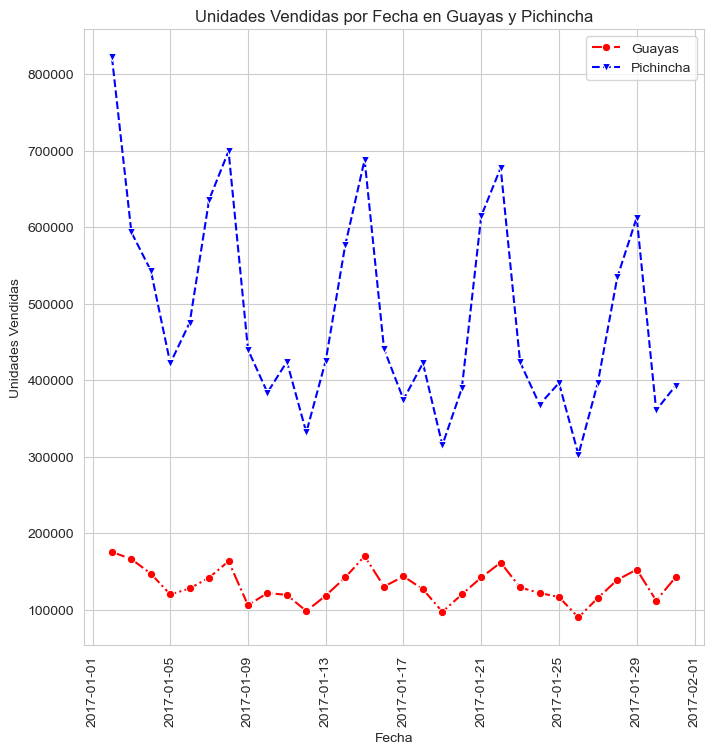

In [49]:
sbn.set_style('whitegrid')
fig,axs = plt.subplots(figsize=(8,8))
sbn.lineplot(data= dfgy_groupby, x ='date', y = 'unit_sales', color='r', marker='o', ax=axs, linestyle='-.', label='Guayas')
sbn.lineplot(data= dfpi_groupby, x ='date', y = 'unit_sales', color='b', marker='v', ax=axs, linestyle='--', label='Pichincha')
_ = plt.xticks(rotation=90)
axs.set_xlabel('Fecha')
axs.set_ylabel('Unidades Vendidas')
axs.set_title('Unidades Vendidas por Fecha en Guayas y Pichincha')
plt.savefig('../Output/Graphs/Unidades Vendidas por Fecha en Guayas y Pichincha.png')

<AxesSubplot:xlabel='date', ylabel='unit_sales'>

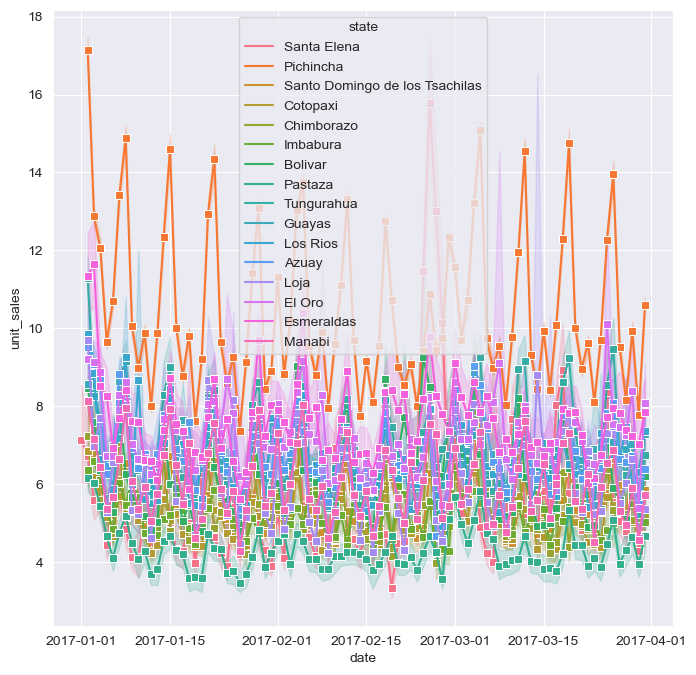

In [50]:
sbn.set_style('darkgrid')
fig,axs = plt.subplots(figsize=(8,8))
sbn.lineplot(data= dfm, x ='date', y = 'unit_sales', color='b', marker='s', ax=axs, hue='state')